In [179]:
import os
import glob
import pandas as pd
import numpy as np

# datasetsフォルダ内にあるcsvファイルの一覧を取得
files1 = glob.glob("../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle*.txt")
files2 = glob.glob("../../../Desktop/GHELIA/myoelectricity/datasets/outside/muscle*.txt")
files3 = glob.glob("../../../Desktop/GHELIA/myoelectricity/datasets/fist/muscle*.txt")

In [180]:
files1

['../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle18.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle19.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle20.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle1.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle2.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle3.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle7.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle6.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle4.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle5.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle8.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle9.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle11.txt',
 '../../../Desktop/GHELIA/myoelectricity/datasets/inside/muscle10.txt',
 

In [181]:
# def read(x, label):
#     f_np = []
#     fa2 = []
#     f_pre = []
#     for i in range (len(x)):
#         f = open(x[i])
#         f_array = f.read().split()
#         f_np = np.append(f_np, f_array)
#         for j in range(100):
#             fa = f_np[j].split(',')
#             fa2 = np.append(fa2, a)
#     for k in range(fa2.shape[0]):
#         f_pre = np.append(f_pre, float(fa2[k]))
#     label = f_pre.reshape(20,100,2)

In [182]:
f1_np =[]
fa1 = []
for i in range(20):
    f1 = open(files1[i])
    f1_array = f1.read().split()
    f1_np = np.append(f1_np, f1_array)
    for j in range(100):
        a1 = f1_np[j].split(",")
        fa1 = np.append(fa1, a1)
fr1 = []
for i in range(fa1.shape[0]):
    fr1 = np.append(fr1,float(fa1[i]))
inside = fr1.reshape(20,100,2)

In [183]:
f2_np =[]
fa2 = []
for i in range(20):
    f2 = open(files2[i])
    f2_array = f2.read().split()
    f2_np = np.append(f2_np, f2_array)
    for j in range(100):
        a2 = f2_np[j].split(",")
        fa2 = np.append(fa2, a2)
fr2 = []
for i in range(fa2.shape[0]):
    fr2 = np.append(fr2,float(fa2[i]))
outside = fr2.reshape(20,100,2)

In [184]:
f3_np =[]
fa3 = []
for i in range(20):
    f3 = open(files3[i])
    f3_array = f3.read().split()
    f3_np = np.append(f3_np, f3_array)
    for j in range(100):
        a3 = f3_np[j].split(",")
        fa3 = np.append(fa3, a3)
fr3 = []
for i in range(fa3.shape[0]):
    fr3 = np.append(fr3,float(fa3[i]))
fist = fr3.reshape(20,100,2)

In [185]:
inside[0,99,1]

3444.0

In [186]:
x_train = []
for i in range(0,15):
    x_train = np.append(x_train, inside[i])
    x_train = np.append(x_train, outside[i])
    x_train = np.append(x_train, fist[i])
x_test = []
for j in range(15,20):
    x_test = np.append(x_test, inside[j])
    x_test = np.append(x_test, outside[j])
    x_test = np.append(x_test, fist[j])

In [187]:
x_train = x_train.reshape(45,100,2)
x_test = x_test.reshape(15,100,2)

In [239]:
# y_train = np.array([0,1,2]).repeat(15)
# y_test = np.array([0,1,2]).repeat(5)
y_train = np.array([0,1,2]*15)
y_test = np.array([0,1,2]*5)

## Load dataset

In [ ]:
def load_wave_data(filename):
    file_path = os.path.join(filename)
    x, fs = librosa.load(filename, sr = 100)
    return x, fs

In [ ]:
def calculate_melsp(x, n_fft=1024, hop_legth=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft, n_mels=128)
    return melsp

In [ ]:
def show_wave(x):
    plt.plot(x)
    plt.show()

In [ ]:
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    plt.colorbar()
    plt.show()

In [ ]:
x, fs = load_wave_data(files1)
melsp = calculate_melsp(x)

## Augumentation

In [ ]:
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [ ]:
def shift_sound(x, rate=2):
    return np.roll(x, int(len(X)//rate))

In [ ]:
def stretch_sound(x. rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x) > input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), 'constant')

## FFT

In [189]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

In [235]:
def wave_plot_fft(f):
    N =  100
    dt = 0.01
    freq = np.linspace(0, 1.0/dt, N)
    yf = f/(N/2)
    
    plt.figure(2)
    plt.plot(freq, np.abs(yf))
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.tight_layout()
    plt.show()

In [191]:
x_train.shape

(45, 100, 2)

In [193]:
X_train = np.zeros((45,100))
for i in range(45):
    for j in range(100):
        X_train_pre = x_train[i][j][1]
#         print(X_train_pre)
        X_train[i][j] = X_train_pre

X_test = np.zeros((15,100))
for i in range(15):
    for j in range(100):
        X_test_pre = x_test[i][j][1]
#         print(X_train_pre)
        X_test[i][j] = X_test_pre

In [194]:
X_train.shape[1]

100

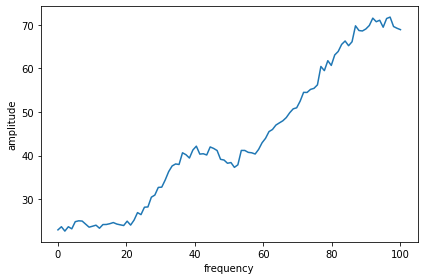

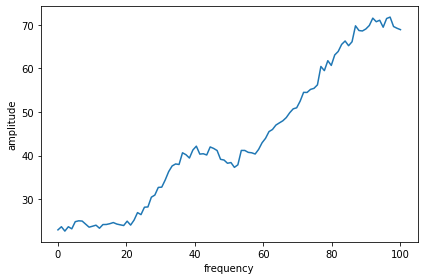

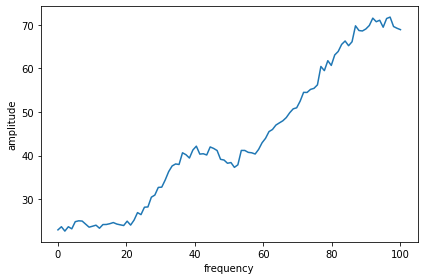

In [238]:
wave_plot_fft(X_train[0])
wave_plot_fft(X_train[3])
wave_plot_fft(X_train[6])

In [196]:
X_train[0]

array([1148., 1184., 1134., 1184., 1160., 1242., 1252., 1249., 1214.,
       1179., 1190., 1202., 1167., 1209., 1210., 1219., 1232., 1215.,
       1206., 1198., 1248., 1203., 1260., 1346., 1323., 1408., 1411.,
       1523., 1547., 1635., 1638., 1720., 1816., 1881., 1904., 1898.,
       2032., 2010., 1972., 2064., 2108., 2017., 2021., 2007., 2099.,
       2082., 2058., 1957., 1949., 1912., 1920., 1865., 1894., 2059.,
       2059., 2037., 2032., 2018., 2071., 2147., 2198., 2275., 2299.,
       2350., 2375., 2399., 2436., 2492., 2536., 2548., 2624., 2725.,
       2724., 2759., 2771., 2811., 3022., 2974., 3088., 3034., 3154.,
       3194., 3275., 3314., 3260., 3305., 3488., 3434., 3429., 3452.,
       3492., 3576., 3535., 3552., 3472., 3572., 3588., 3480., 3460.,
       3444.])

In [222]:
x_train_pre = []
for i in range(45):
    x_train_pre = np.append(x_train_pre,fft(X_train[i]))

X_train_fft = x_train_pre.reshape(45,100)
x_test_pre = []
for i in range(15):
    x_test_pre = np.append(x_test_pre,fft(X_test[i]))

X_test_fft = x_test_pre.reshape(15,100)

In [223]:
X_train_fft.shape

(45, 100)

## convolution1D

In [141]:
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization, Add
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import MaxPool1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [143]:
batch_size = 64
num_classes = 3
epochs = 50

In [224]:
X_train_tf = np.reshape(X_train_fft, (X_train_fft.shape[0], -1, 1))
X_test_tf = np.reshape(X_test_fft, (X_test_fft.shape[0], -1, 1))

In [248]:
X_train_tf.shape

(45, 100, 1)

In [240]:
y_train_tf = keras.utils.to_categorical(y_train, num_classes)
y_test_tf = keras.utils.to_categorical(y_test, num_classes)

In [160]:
model = Sequential()

model.add(Conv1D(filters=128, input_shape=(X_train_fft.shape[1],1), kernel_size=2, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Activation('relu'))

model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Activation('relu'))

model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop()
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [161]:
es = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')

In [244]:
history_fft = model.fit(X_train_tf, y_train_tf,
                       batch_size = batch_size,
                       epochs = epochs,
                       verbose =1,
                       validation_data = (X_test_tf, y_test_tf),
                       callbacks = [es])

Train on 45 samples, validate on 15 samples
Epoch 1/50
45/45 [==============================] - 0s 1ms/step - loss: 2.4370e-04 - acc: 1.0000 - val_loss: 0.0125 - val_acc: 1.0000
Epoch 2/50
45/45 [==============================] - 0s 1ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0126 - val_acc: 1.0000
Epoch 3/50
45/45 [==============================] - 0s 1ms/step - loss: 2.0680e-04 - acc: 1.0000 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 4/50
45/45 [==============================] - 0s 978us/step - loss: 4.8753e-04 - acc: 1.0000 - val_loss: 0.0109 - val_acc: 1.0000
Epoch 5/50
45/45 [==============================] - 0s 877us/step - loss: 7.0126e-04 - acc: 1.0000 - val_loss: 0.0105 - val_acc: 1.0000
Epoch 6/50
45/45 [==============================] - 0s 706us/step - loss: 2.8260e-04 - acc: 1.0000 - val_loss: 0.0097 - val_acc: 1.0000
Epoch 7/50
45/45 [==============================] - 0s 909us/step - loss: 3.7172e-04 - acc: 1.0000 - val_loss: 0.0091 - val_acc: 1.0000
Epoch 8/50
45/

In [245]:
score = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.00047582175466232
Test accuracy: 1.0


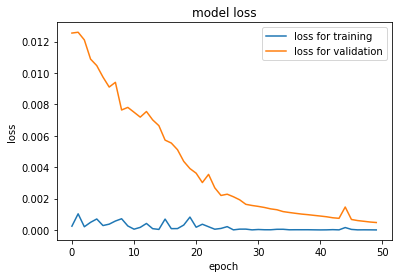

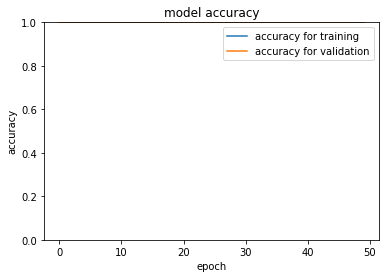

In [246]:
def plot_history_lost(history):
    plt.plot(history.history['loss'], label='loss for training')
    plt.plot(history.history['val_loss'], label='loss for validation')
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()
    
def plot_history_acc(history):
    plt.plot(history.history['acc'], label='accuracy for training')
    plt.plot(history.history['val_acc'], label='accuracy for validation')
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0,1])
    plt.show()
    
plot_history_lost(history_fft)
plot_history_acc(history_fft)